## Silk road analysis

This page summarise in the table below all the Silk Road forum users with a vendor profile. When the page exists and could be found the column "Vendor Profile" redirects to the Silk Road Vendor page of the user. The vendors pages are taken from the last StExo archives dated June 21st 2013. In some cases the vendor pages were not available in the StExo archive and will thus redirect to an error 404. A listing of the archived vendors pages is also available here.

---

In [50]:
import pandas as pd
import numpy as np
#from thesaurus import Word
from dateutil import parser
from datetime import datetime
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
%matplotlib inline

### DPR Posts

In [51]:
dprposts = pd.read_csv('dprposts.csv', header=None)
dprposts.columns = ['link', 'post', 'date', 'time', 'username']

In [52]:
print('DPR Posts {}'.format(len(dprposts)))

DPR Posts 22631


In [53]:
dprposts.head(20)

,link,post,date,time,username
0,http://antilop.cc/sr/users/dpr/html/dpr_posts_...,\n\t\t\t\t\tIt warms my heart to see everyone'...,"October 01, 2013,",05:23 am,Dread Pirate Roberts
1,http://antilop.cc/sr/users/dpr/html/dpr_posts_...,"\nQuote from: John Galt on September 25, 2013,...","September 25, 2013,",02:44 am,Dread Pirate Roberts
2,http://antilop.cc/sr/users/dpr/html/dpr_posts_...,\n\t\t\t\t\tWe've corrected the problem with d...,"September 25, 2013,",12:07 am,Dread Pirate Roberts
3,http://antilop.cc/sr/users/dpr/html/dpr_posts_...,"\n\t\t\t\t\tok, we're back. some deposits are...","September 24, 2013,",12:59 am,Dread Pirate Roberts
4,http://antilop.cc/sr/users/dpr/html/dpr_posts_...,\n\t\t\t\t\thad to take the site down for just...,"September 24, 2013,",12:41 am,Dread Pirate Roberts
5,http://antilop.cc/sr/users/dpr/html/dpr_posts_...,\n\t\t\t\t\tAtlantis was good for Silk Road an...,"September 20, 2013,",07:11 pm,Dread Pirate Roberts
6,http://antilop.cc/sr/users/dpr/html/dpr_posts_...,\n\t\t\t\t\tI was asked a couple of questions ...,"September 18, 2013,",10:32 pm,Dread Pirate Roberts
7,http://antilop.cc/sr/users/dpr/html/dpr_posts_...,"\n\t\t\t\t\tAs usual, great points have been r...","September 15, 2013,",10:49 pm,Dread Pirate Roberts
8,http://antilop.cc/sr/users/dpr/html/dpr_posts_...,\n\t\t\t\t\tthis is a grey aread. up to this ...,"September 15, 2013,",10:22 pm,Dread Pirate Roberts
9,http://antilop.cc/sr/users/dpr/html/dpr_posts_...,\n\t\t\t\t\tnothing has changed. the N/A is u...,"September 15, 2013,",10:17 pm,Dread Pirate Roberts


In [29]:
dprposts['post'][0]

"\n\t\t\t\t\tIt warms my heart to see everyone's generosity.\xa0 There are a couple of points I'd like to mention about giving to charity.\xa0 For one, I think it is an important pillar of civil society.\xa0 Our capacity for empathy and wanting others to succeed should not be ignored or downplayed.\xa0 A lack of charitable spirit is often used as a point in favor of a central authority with the power to take from the rich and give to the poor.\xa0 It is said that, absent government intervention, no one would have the incentive to help those who are in need and have little to give in return.\xa0 You are proving them wrong right now.Second, you must be responsible for the effect of money on your fellow man.\xa0 Money encourages and motivates people to do whatever they have to in order to get that money.\xa0 For an employee, that's doing a good job and pleasing their boss, or maybe blending in and not risking a visible mistake, or maybe lying on their resume.\xa0 For a businessman, that c

In [5]:
#cleaning dates part 1 
dprposts_integerdate = dprposts.sort_values('date')[:683]
listi = []
for i in dprposts_integerdate.index:
    stem = dprposts_integerdate['date'][i]
    listi.append(pd.to_datetime(stem[6:8]+stem[4:6]+stem[:4] , format='%d%m%Y'))

dprposts_integerdate['date'] = listi
#cleaning dates part 2
dprposts_strdate = dprposts.sort_values('date')[683:-1]
temp_vec = []
for i in dprposts_strdate.index:
    stem = dprposts_strdate['date'][i][:-1]
    temp_vec.append(pd.to_datetime(parser.parse(stem), format='%d%m%Y'))

dprposts_strdate['date'] = temp_vec
dprposts = dprposts_integerdate.append(dprposts_strdate)

### Post over time

In [6]:
dprposts.groupby('username').count()['link'].sort_values(ascending=False)

username
Dread Pirate Roberts       2048
kmfkewm                     314
Jack N Hoff                 203
Limetless                   162
BruceCampbell               160
astor                       129
USdirectforyou              127
Mcrad                       127
anarcho47                   123
scout                       109
ChemCat                      84
pine                         82
Libertas                     81
samesamebutdifferent         79
JezuzWazaMushroom            76
BenJesuit                    73
nomad bloodbath              72
Qthello                      70
RS7FI8ZRkm                   65
divinechemicals              63
cirrus                       60
livestr0ng                   59
TravellingWithoutMoving      58
DonnyBerger                  57
Hungry ghost                 57
phubaiblues                  56
Praetorian                   56
goblin                       54
Cimicon-Rep                  54
jagfug                       53
                           ... 

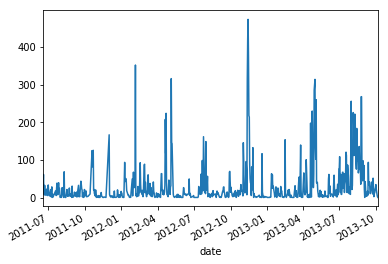

In [7]:
dprposts.groupby('date').count()['post'].plot()

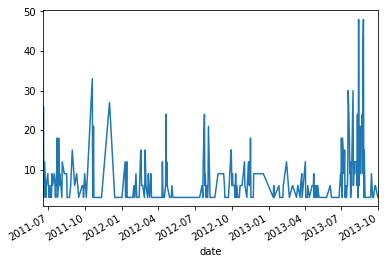

In [8]:
dpr = dprposts[dprposts['username'] == 'Dread Pirate Roberts']
dpr.groupby('date').count()['post'].plot()

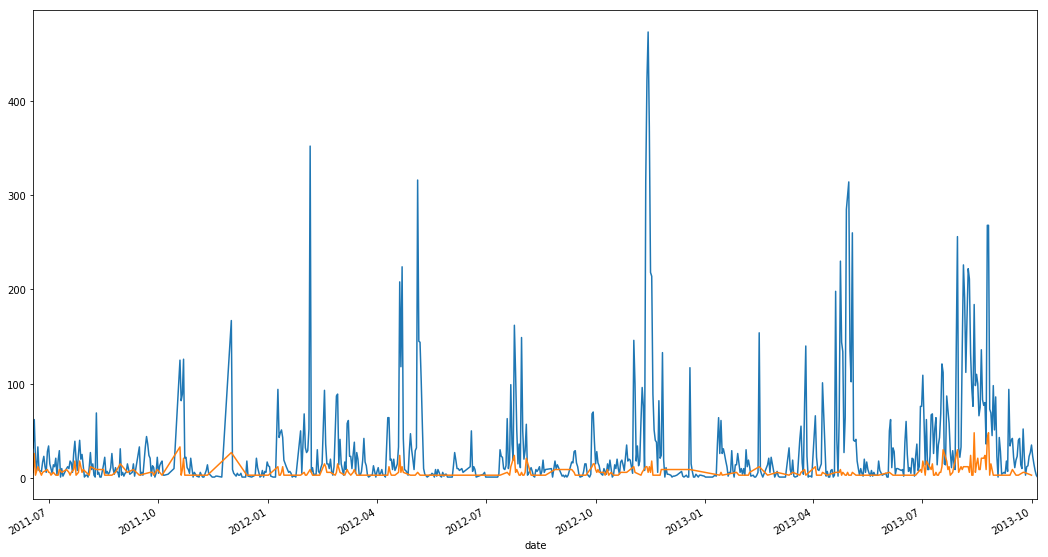

In [9]:
plt.figure(figsize=(18,10))
dprposts.groupby('date').count()['post'].plot()
dpr.groupby('date').count()['post'].plot()

---
## Urban dictionary playground

In [3]:
#!python urbandictionary-py/setup.py install

In [4]:
#!pip uninstall urbandictionary -y

In [13]:
from urbandictionary_py import urbandictionary as ud

In [35]:
defs = ud.define(dprposts['post'][1])

In [36]:
len([i for i in defs])

10

In [37]:
for d in defs:
    print(d.definition)

A phrase used by someone who doesn't [agree] with you or simply doesn't have any knowledge on the subject, but feels they must have an [opinion] [anyways].
[The act] of [doing it] [toing] it.
Phrase: [the motto] of the [Los Angeles] [Police] Department.
To get kicked off your [ISP] for [violating] the "[Terms Of Service]"
To [poke] [somebody] in the [vagina]
The act of [sticking] [a Toe] up [one's] ass.
AKA - [I don't want to] take the time or [energy] to describe this [to you].
Just [click] Agree, [nevermind] the [TOS]
For [Trekkies], "The Original Series", refering to the first [Star Trek] series to [grace] television networks everywhere
To stick [a toe] into an [oriface]. Usually the anal or [vaginal] oriface.


In [32]:
dprposts['post'][0]

"\n\t\t\t\t\tIt warms my heart to see everyone's generosity.\xa0 There are a couple of points I'd like to mention about giving to charity.\xa0 For one, I think it is an important pillar of civil society.\xa0 Our capacity for empathy and wanting others to succeed should not be ignored or downplayed.\xa0 A lack of charitable spirit is often used as a point in favor of a central authority with the power to take from the rich and give to the poor.\xa0 It is said that, absent government intervention, no one would have the incentive to help those who are in need and have little to give in return.\xa0 You are proving them wrong right now.Second, you must be responsible for the effect of money on your fellow man.\xa0 Money encourages and motivates people to do whatever they have to in order to get that money.\xa0 For an employee, that's doing a good job and pleasing their boss, or maybe blending in and not risking a visible mistake, or maybe lying on their resume.\xa0 For a businessman, that c

---

### TF-IDF DPR

In [17]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(dprposts['post'])
idf = tfidf.idf_

In [18]:
weights = np.asarray(train_vect.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tfidf.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)
#dict(zip(tfidf.get_feature_names(), idf))

,term,weight
470,just,0.034842
277,dpr,0.033899
839,sr,0.033135
507,like,0.028136
708,quote,0.025515
877,thanks,0.022955
639,people,0.022446
26,2013,0.021747
888,time,0.021190
816,site,0.020783


In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [20]:
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in weights_df['term']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens:
        comment_words = comment_words + words + ' '

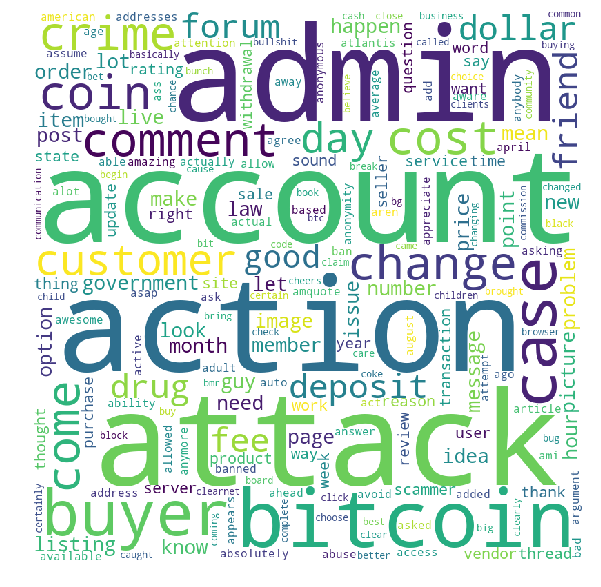

In [21]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

---

In [39]:
#dprposts['post']

In [58]:
#!pip install vaderSentiment

In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
analyser = SentimentIntensityAnalyzer()

In [46]:
def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    print("{:-<40} \n\n{}".format(sentence, str(score)))

In [47]:
sentence = "No that's absolute bullshit for guys like me perfect example I sell digital good the only way i make ANYTHING is by volume not by amount my current average price is .14 btc I am going to have to lower that to .07 and you want to take 15 % on top of that ? common that's a crock of shit and unless you want me to put up 4,000 listings for 4,000 different items so i can increase my front page time i can't have 15% it literally makes me as a seller pointless it's like im in china make shoes for a slave driver just to make my btc"

In [55]:
sentence1=dprposts['post'][0]

In [56]:
sentiment_analyzer_scores(sentence)

No that's absolute bullshit for guys like me perfect example I sell digital good the only way i make ANYTHING is by volume not by amount my current average price is .14 btc I am going to have to lower that to .07 and you want to take 15 % on top of that ? common that's a crock of shit and unless you want me to put up 4,000 listings for 4,000 different items so i can increase my front page time i can't have 15% it literally makes me as a seller pointless it's like im in china make shoes for a slave driver just to make my btc 

{'neg': 0.099, 'neu': 0.746, 'pos': 0.156, 'compound': 0.5829}


In [19]:
sentiment_analyzer_scores(
"I really love you")

I really love you----------------------- {'neg': 0.0, 'neu': 0.308, 'pos': 0.692, 'compound': 0.6697}


In [27]:
sentiment_analyzer_scores(
"fucking brilliant!")

fucking brilliant!---------------------- {'neg': 0.0, 'neu': 0.186, 'pos': 0.814, 'compound': 0.6581}


---

#### Vendors dataset

In [46]:
vendors = pd.read_csv('silk-road-vendors.csv')

In [47]:
vendors.head()

,Username,Forum Profile,Vendor Profile,Date Registered,Last Active,Signature,Personal Text,Custom Title,Location,Posts,Karma
0,Herbal Remedy,53689,39a9ee57e6,2013/02/05 07:30,2013/09/01 02:38,Vendor page and PGP public key: \nhttp://silk...,NaN,NaN,NaN,63 (0.257 per day),+1/-0
1,nomad bloodbath,89,f6b29a3812,2011/06/18 13:54,2013/10/07 02:42,R.I.P. Moderator 2011-2013\n18dtoSZVvSNC3Z8iqR...,Local Silverback,Silk Road Revolutionary,18dtoSZVvSNC3Z8iqRLCZLK83jAS6otycP,4179 (4.957 per day),+528/-94
2,elk,15825,NaN,2012/03/28 21:52,NaN,check out my listings here: \nsilkroadvb5piz3r...,NaN,NaN,NaN,11 (0.020 per day),+0/-0
3,TimHortons,78920,c3e3aafc10,2013/07/13 00:35,2013/10/01 02:39,Vendor Page: http://silkroadvb5piz3r.onion/sil...,NaN,NaN,NaN,73 (0.839 per day),+3/-0
4,safesecureair,34928,31866db3c2,2012/09/18 06:38,2013/09/20 12:07,http://silkroadvb5piz3r.onion/index.php/silkro...,NaN,NaN,NaN,5 (0.013 per day),+0/-1


In [48]:
vendors_pt = vendors[vendors['Personal Text'].notnull()]

In [49]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word', stop_words= 'english',ngram_range=(1,1))
train_vect = tfidf.fit_transform(vendors_pt['Personal Text'])
idf = tfidf.idf_

In [50]:
weights = np.asarray(train_vect.mean(axis=0)).ravel().tolist()
weights_df = pd.DataFrame({'term': tfidf.get_feature_names(), 'weight': weights})
weights_df.sort_values(by='weight', ascending=False).head(20)
#dict(zip(tfidf.get_feature_names(), idf))

,term,weight
486,vendor,0.076068
428,sr,0.051977
498,weed,0.017602
252,love,0.014162
362,quality,0.013143
202,high,0.012473
479,uk,0.011545
410,silk,0.010935
223,just,0.010650
257,lsd,0.009930


In [36]:
#!pip install wordcloud

In [51]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
% matplotlib inline

In [58]:
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in weights_df['term']: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens:
        comment_words = comment_words + words + ' '

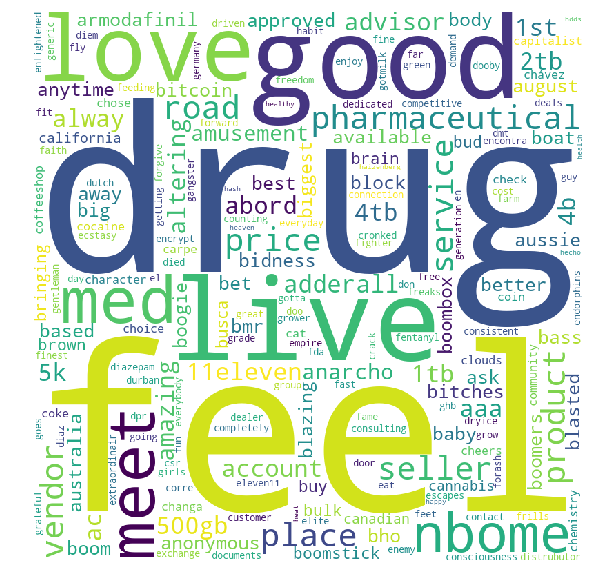

In [61]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 

---

#### Trial dataset

In [78]:
with open('silkroadtrial.txt') as f:
    silkroadtrial = f.read().splitlines()

In [82]:
silkroadtrial[0]

'UNITED STATES OF AMERICA v. ROSS WILLIAM ULBRICHT Trial Transcript'

In [83]:
comment_words = ' '
stopwords = set(STOPWORDS) 
for val in silkroadtrial: 
    val = str(val) 
    tokens = val.split() 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
    for words in tokens:
        comment_words = comment_words + words + ' '

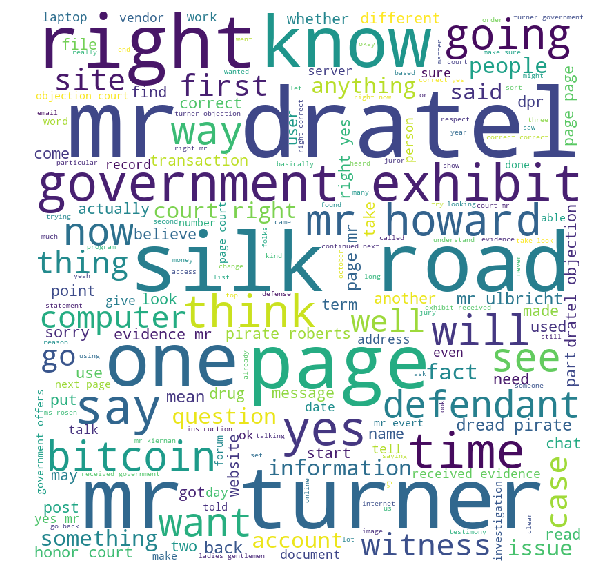

In [86]:
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
plt.show() 